$$ MCMC之Metropolis-Hastings采样算法python代码理解 $$

在Metropolis-Hastings采样算法的过程中，首先初始化状态值 $\theta^{(1)},$ 然后利用一个已知的分布 $q\left(\theta \mid \theta^{(t-1)}\right)$ 生成一个新的 候选状态 $\theta^{(*)},$ 随后根据一定的概率选择接受这个新值，或者拒绝这个新值，与Metropolis采样算法不同的是，在Metropolis-Hastings采样算法中，概率为：
$$
\alpha=\min \left(1, \frac{p\left(\theta^{(*)}\right)}{p\left(\theta^{(t-1)}\right)} \frac{q\left(\theta^{(t-1)} \mid \theta^{(*)}\right)}{q\left(\theta^{(*)} \mid \theta^{(t-1)}\right)}\right)
$$
$\theta^{(t)}$ 即为目标分布 $p(\theta)$ 中的样本。 这样的过程一直持续到采样过程的收玫，当收玫以后，样本
Vetropolis-Hastings采样算法的流程：
- 初始化时间 $t=1$
- 设置 $u$ 的值，并初始化初始状态 $\theta^{(t)}=u$
-重厦以下的过程：
$$
\text { - } \hat{\vartheta} t=t+1
$$
- 从已知分布 $q\left(\theta \mid \theta^{(t-1)}\right)$ 中生成一个候选状态 $\theta^{(*)}$
$\bullet$ 计算接受的概率 $: \alpha=\min \left(1, \frac{p\left(\theta^{(t)}\right)}{p\left(\theta^{(t-1)}\right)} \frac{q\left(\theta^{(t-1)} \mid \theta^{(+)}\right)}{q\left(\theta^{(*)} \mid \theta^{(t-1)}\right)}\right)$
从均勿分布Uniform (0,1) 生成一个随机值 $a$
- 如果 $a \leqslant \alpha,$ 接受新生成的值 $: \theta^{(t)}=\theta^{(*)} ;$ 否则 $: \theta^{(t)}=\theta^{(t-1)}$
- 直到 $t=T$
实验
假设需要从柯西分布中采样数据，我们利用Metropolis采样算法来生成样本，其中，柯西分布的概率密度函数为：
$$
f(\theta)=\frac{1}{\pi\left(1+\theta^{2}\right)}
$$
那么，根据上述的Metropolis采样算法的流程，接受概率a的值为：
$$
\alpha=\min \left(1, \frac{1+\left[\theta^{(t)}\right]^{-}}{1+\left[\theta^{(*)}\right]^{2}}\right)
$$
代码如下:

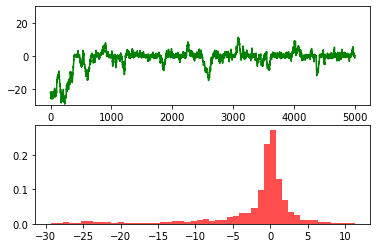

In [1]:
# 代码一：有助于理解算法流程
'''
Created on 2018年5月15日
@author: user
'''
import random
from scipy.stats import norm
import matplotlib.pyplot as plt
 
def cauchy(theta):#从柯西分布p中采样数据
    y = 1.0 / (1.0 + theta ** 2)
    return y
 
T = 5000
sigma = 1
thetamin = -30
thetamax = 30
theta = [0.0] * (T+1)
theta[0] = random.uniform(thetamin, thetamax)
 
t = 0
while t < T:
    t = t + 1
    
    theta_star = norm.rvs(loc=theta[t - 1], scale=sigma, size=1, random_state=None)#从已知正态分布q中生成候选状态
 
    alpha = min(1, (cauchy(theta_star[0]) / cauchy(theta[t - 1])) )
 
    u = random.uniform(0, 1)
    if u <= alpha:#接受
        theta[t] = theta_star[0]
    else:
        theta[t] = theta[t - 1]
 
#print (theta)
ax1 = plt.subplot(211)
ax2 = plt.subplot(212) 
plt.sca(ax1)
plt.ylim(thetamin, thetamax)
plt.plot(range(T+1), theta, 'g-')
plt.sca(ax2)
num_bins = 50
plt.hist(theta, num_bins,density=1, facecolor='red', alpha=0.7)
plt.show()


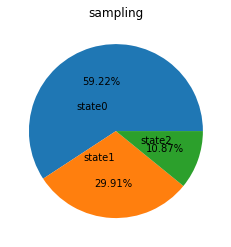

In [2]:
# 代码2：有助于理解样本

# p:输入的概率分布，离散情况采用元素为概率值的数组表示
# N:认为迭代N次马尔可夫链收敛
# Nlmax:马尔可夫链收敛后又取的服从p分布的样本数
# isMH:是否采用MH算法，默认为True
 
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from array import array
 
def mcmc(p,N=10000,Nlmax=10000,isMH=True):
    
    A = np.array([p for y in range(len(p))], dtype=np.float64) 
    X0 = np.random.randint(len(p))
    count = 0
    samplecount = 0
    L = array("d",[X0])
    l = array("d")
    
    while True:
        X = int(L[samplecount])
        cur = np.argmax(np.random.multinomial(1,A[X]))
        count += 1
        if isMH:
            a = (p[cur]*A[cur][X])/(p[X]*A[X][cur])
            alpha = min(a,1)
        else:
            alpha = p[cur]*A[cur][X]
        u = np.random.uniform(0,1) 
        if u<alpha:
            samplecount += 1
            L.append(cur)
            if count>N:
                l.append(cur)
        if len(l)>=Nlmax:
            break
        else:
            continue
    La = np.frombuffer(L)
    la = np.frombuffer(l)
    return La,la
 
def count(q,n):
    L = array("d")
    l1 = array("d")
    l2 = array("d")
    for e in q:
        L.append(e)
    for e in range(n):
        l1.append(L.count(e))
    for e in l1:
        l2.append(e/sum(l1))
    return l1,l2
 
if __name__ == '__main__':    
    p = np.array([0.6,0.3,0.1])
    a = mcmc(p)[1]
    l1 = ['state%d'% x for x in range(len(p))]
    plt.pie(count(a,len(p))[0],labels=l1,labeldistance=0.3,autopct='%1.2f%%')
    plt.title("sampling")
    plt.show()